## Here, we are implementing Multilayer precetrons using Traffic Dataset for predicting the future traffic counts. 

Intailly we are importing libraries to impport the data and visulaize it.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DataSet/train27303.csv')
data.head()

,timestamp,hourly_traffic_count
0,2015-10-04 00:00:00,3
1,2015-10-04 00:05:00,16
2,2015-10-04 00:10:00,9
3,2015-10-04 00:15:00,12
4,2015-10-04 00:20:00,19


## Some Libraries to impliment Perprocessing 
MinMax Scalar - To get scalar values in the range of 0 to 1

Tenserflow - Basically, Open source library for numerical computation to process ML and Neural Network for easier and faster development.

Keras - Also, Open source but act as a interface for Tensorflow.

math -  Used to calculate range of values.

Sequential - To arrange keras layer in a sequence.

Dense - Contains deeply connected neurons and info that is passed to next layer by the pervious layer.

Inline - After executing this command plots are directly plotted below the cell.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

In [ ]:
df = data.reset_index()['hourly_traffic_count']
df.head()

0     3
1    16
2     9
3    12
4    19
Name: hourly_traffic_count, dtype: int64

iLoc - helps to select the specific rows in the dataset. 

In [ ]:
df = df.iloc[:9792,]
df.tail()

9787    23
9788    25
9789    16
9790    18
9791    25
Name: hourly_traffic_count, dtype: int64

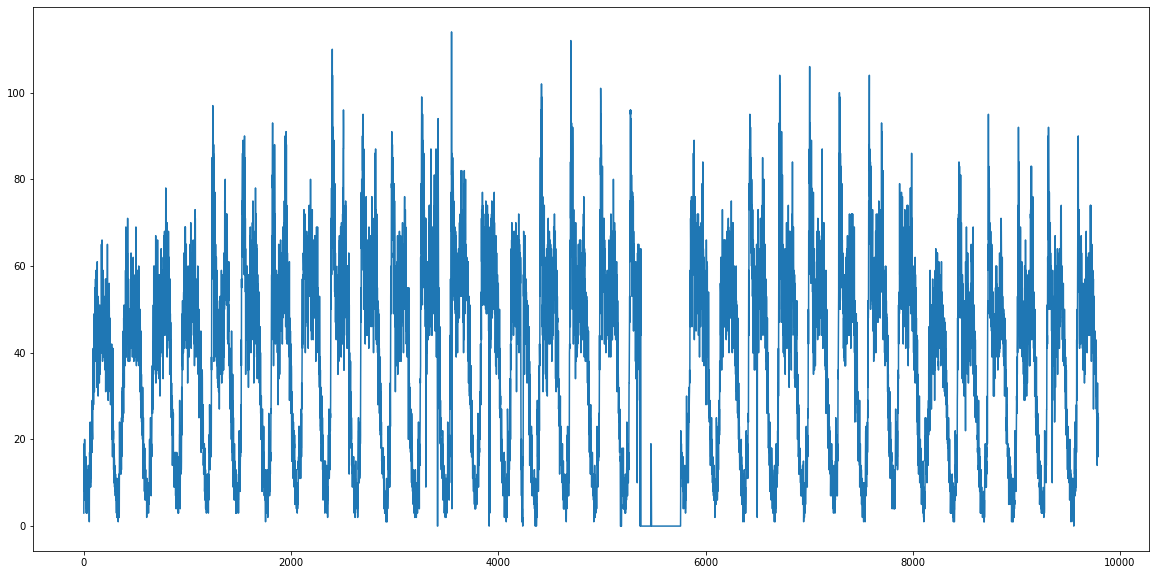

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df)
plt.show()

## Here, we will reshape the window size

The code creates a dataset with two columns, x and y. for example, 
After looping through all of the rows in the dataset, if there are three rows left to process, it will create a third column called z with values 0-2.

In [ ]:
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

## We will now scale the features to there min to max value that is 0 to 1.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

## Here we are divding are dataset to train and test. 80 by 20 format 80% is the train data and 20% is the test data.

In [ ]:
training_size = int(len(df)*0.80)
test_size = len(df)-training_size
train_data, test_data = df[0:training_size,:], df[training_size:len(df),:1]

Creating our x_train, y_train, x_test, and y_test to the window size of 288.

In [ ]:
window = 288
X_train,y_train = create_dataset(train_data,window)
X_test, y_test = create_dataset(test_data,window)

## Multilayer Perceptrons 

Here, we are seqeuncing our keras layer and dense to keep our neurons connected.

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=window, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

## we will use Adagrad to optimize our learning rate to 0.05. basically adagrad is a optimizer in keras.

In [ ]:
opt  = keras.optimizers.Adagrad(learning_rate = 0.05)

## In this code we will complie optimizer as opt and loss as Mean Squared error. Mean Squared error means The average squared difference between the estimated and actual values.

In [ ]:
model.compile(optimizer=opt ,loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                14450     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 40)                2040      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 19,081
Trainable params: 19,081
Non-trainable params: 0
_________________________________________________________________


## epochs - It is the training the data for one cycle.
## Verbose - How you wanna  see the data while training.

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 2/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 3/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 4/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 5/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 6/100
755/755 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 7/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 8/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 9/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 10/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 11/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 12/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 13/100


## Predicting Traffic Count (Future)


Giving the actual data for predictions

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

53/53 [==============================] - 0s 960us/step


## Here, we are inverse transforming train and test data for prediction.
Inverse Transform means your rows becomes column and colunm becomes rows.

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

Changing the Datatype to int

In [ ]:
train_predict = train_predict.astype(int)
test_predict = test_predict.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

Mean squared error means the average betwween predicted and the actual values 

Mean Absolute error means the magnitude of difference between predicted and the actual values

R2 score represents the goodness of your model.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE-train:',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE-train:',mean_absolute_error(y_train,train_predict))
print('R_2-train:',r2_score(y_train,train_predict))

RMSE-train: 6.498715102630193
MAE-train: 4.771739130434782
R_2-train: 0.9256240450141862


In [ ]:
print('RMSE-test:',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE-test:',mean_absolute_error(y_test,test_predict))
print('R_2-train:',r2_score(y_test,test_predict))

RMSE-test: 7.177392984913133
MAE-test: 5.408383233532934
R_2-train: 0.8718535684563291
